In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import plotly.plotly as py
# import plotly.graph_objs as go

%matplotlib notebook

In [3]:
# save as a json file
df = pd.read_json('vegas_buiness_with_chain_cluster_age_nearbyCount_starCoef_priceLevel.json', lines = True)
df.head()

,address,age,attributes,business_id,categories,city,cluster_kMeans_centroid,cluster_label_AgglomerativeClustering,cluster_label_kMeans,hours,...,longitude,name,nearby_count,neighborhood,postal_code,price_level,review_count,star_coef,stars,state
0,,1,"{u'GoodForMeal': u'{'dessert': False, 'latenig...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",...,-114.939821,CK'S BBQ & Catering,29,,89002,2.00000,3,0.000000,4.5,NV
1,703 N Rancho Dr,7,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",0,0,None,...,-115.176916,Citi Trends,344,,89106,2.00000,4,-0.000029,4.0,NV
2,1549 N Rancho Dr,6,None,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",...,-115.186124,Nevada Title And Payday Loans,256,,89106,1.80918,4,0.000000,1.0,NV
3,"3940 Martin Luther King Blvd, Ste 101",1,"{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",...,-115.159272,CakesbyToi,115,,89106,1.80918,3,0.002122,1.5,NV
4,,5,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,None,...,-115.171130,Park Stone Pavers,243,,89031,1.80918,20,0.000000,5.0,NV


In [35]:
df_ml = df[["age", "business_id", 
            "cluster_kMeans_centroid", "cluster_label_AgglomerativeClustering", 
            "cluster_label_kMeans", "nearby_count", "price_level",
            "review_count", "star_coef",
            "is_chain", "stars", "is_open"]]
df_ml.head()

,age,business_id,cluster_kMeans_centroid,cluster_label_AgglomerativeClustering,cluster_label_kMeans,nearby_count,price_level,review_count,star_coef,is_chain,stars,is_open
0,1,AjEbIBw6ZFfln7ePHha9PA,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,29,2.00000,3,0.000000,0,4.5,0
1,7,hTzcHtk4-0QJnFUbkKpd5Q,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",0,0,344,2.00000,4,-0.000029,1,4.0,1
2,6,UwIpS9UKsPiKAv1fiEYhqg,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,256,1.80918,4,0.000000,0,1.0,1
3,1,vJIuDBdu01vCA8y1fwR1OQ,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,115,1.80918,3,0.002122,0,1.5,0
4,5,YZCHr68c5aEVHz0bkq9K2g,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,243,1.80918,20,0.000000,0,5.0,1


In [40]:
# convert cluster_kMeans_centroid to similarity with all one
df_cluster_similarity = df[["business_id", "cluster_kMeans_centroid"]]

In [41]:
# create new col
df["cluster_similarity"] = 0.0

In [45]:
for index, row in df_cluster_similarity.iterrows():
    # print type(row[1])
    # print row[1]
    # print sum(row[1])
    df.loc[index, "cluster_similarity"] = sum(row[1])

In [46]:
df_ml = df[["age", "business_id", 
            "cluster_kMeans_centroid", "cluster_label_AgglomerativeClustering", 
            "cluster_label_kMeans", "cluster_similarity","nearby_count", "price_level",
            "review_count", "star_coef",
            "is_chain", "stars", "is_open"]]
df_ml.head()

,age,business_id,cluster_kMeans_centroid,cluster_label_AgglomerativeClustering,cluster_label_kMeans,cluster_similarity,nearby_count,price_level,review_count,star_coef,is_chain,stars,is_open
0,1,AjEbIBw6ZFfln7ePHha9PA,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,2.089968,29,2.00000,3,0.000000,0,4.5,0
1,7,hTzcHtk4-0QJnFUbkKpd5Q,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",0,0,2.089968,344,2.00000,4,-0.000029,1,4.0,1
2,6,UwIpS9UKsPiKAv1fiEYhqg,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,2.430353,256,1.80918,4,0.000000,0,1.0,1
3,1,vJIuDBdu01vCA8y1fwR1OQ,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,2.089968,115,1.80918,3,0.002122,0,1.5,0
4,5,YZCHr68c5aEVHz0bkq9K2g,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,2.430353,243,1.80918,20,0.000000,0,5.0,1


In [47]:
# Try different classification techniques
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# model
clf_LogistcRegression = LogisticRegression(random_state = 1)
clf_GaussianNB = GaussianNB()
clf_DecisionTree = DecisionTreeClassifier(random_state = 1)
clf_GradientBoost = GradientBoostingClassifier(random_state = 1)
clf_RandomForest = RandomForestClassifier(random_state = 1)

In [69]:
'''
df_ml_features = df_ml[["age", "cluster_label_AgglomerativeClustering", 
            "cluster_label_kMeans", "cluster_similarity", "nearby_count", "price_level",
            "review_count", "star_coef",
            "is_chain", "stars"]]
'''
df_ml_features = df_ml[["age", "cluster_similarity", "nearby_count", "price_level",
            "review_count", "star_coef",
            "is_chain", "stars"]]

In [70]:
df_ml_features.head()

,age,cluster_similarity,nearby_count,price_level,review_count,star_coef,is_chain,stars
0,1,2.089968,29,2.00000,3,0.000000,0,4.5
1,7,2.089968,344,2.00000,4,-0.000029,1,4.0
2,6,2.430353,256,1.80918,4,0.000000,0,1.0
3,1,2.089968,115,1.80918,3,0.002122,0,1.5
4,5,2.430353,243,1.80918,20,0.000000,0,5.0


In [71]:
df_ml_gt = df_ml["is_open"]

In [72]:
df_ml_gt.head()

0    0
1    1
2    1
3    0
4    1
Name: is_open, dtype: int64

## feature visualization

In [73]:
# shufflue rows and randomly pick 2000 smaples for visualization
df_ml_features_test = df_ml_features.values
np.random.seed(seed = 50)
np.random.shuffle(df_ml_features_test)
df_ml_features_test_random = df_ml_features_test[:5000]

In [74]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(df_ml_features_test_random)

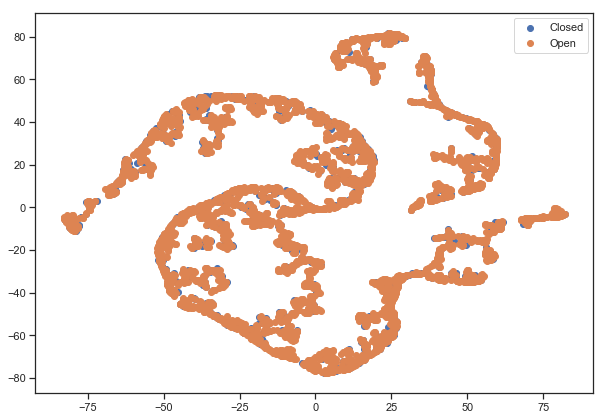

In [75]:
plt.figure(figsize = (10, 7))
unique = [0, 1]
# colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [X_embedded[j, 0] for j  in range(len(X_embedded)) if df_ml_gt[j] == u]
    yi = [X_embedded[j, 1] for j  in range(len(X_embedded)) if df_ml_gt[j] == u]
    lablei = "Open" if u == 1 else "Closed"
    plt.scatter(xi, yi, label = lablei)
plt.legend()

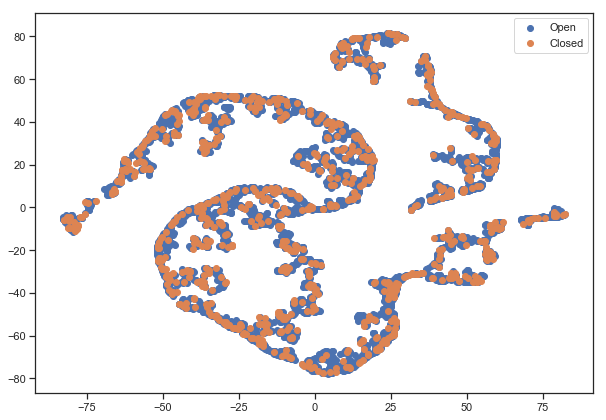

In [76]:
plt.figure(figsize = (10, 7))
unique = [1, 0]
# colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [X_embedded[j, 0] for j  in range(len(X_embedded)) if df_ml_gt[j] == u]
    yi = [X_embedded[j, 1] for j  in range(len(X_embedded)) if df_ml_gt[j] == u]
    lablei = "Open" if u == 1 else "Closed"
    plt.scatter(xi, yi, label = lablei)
plt.legend()

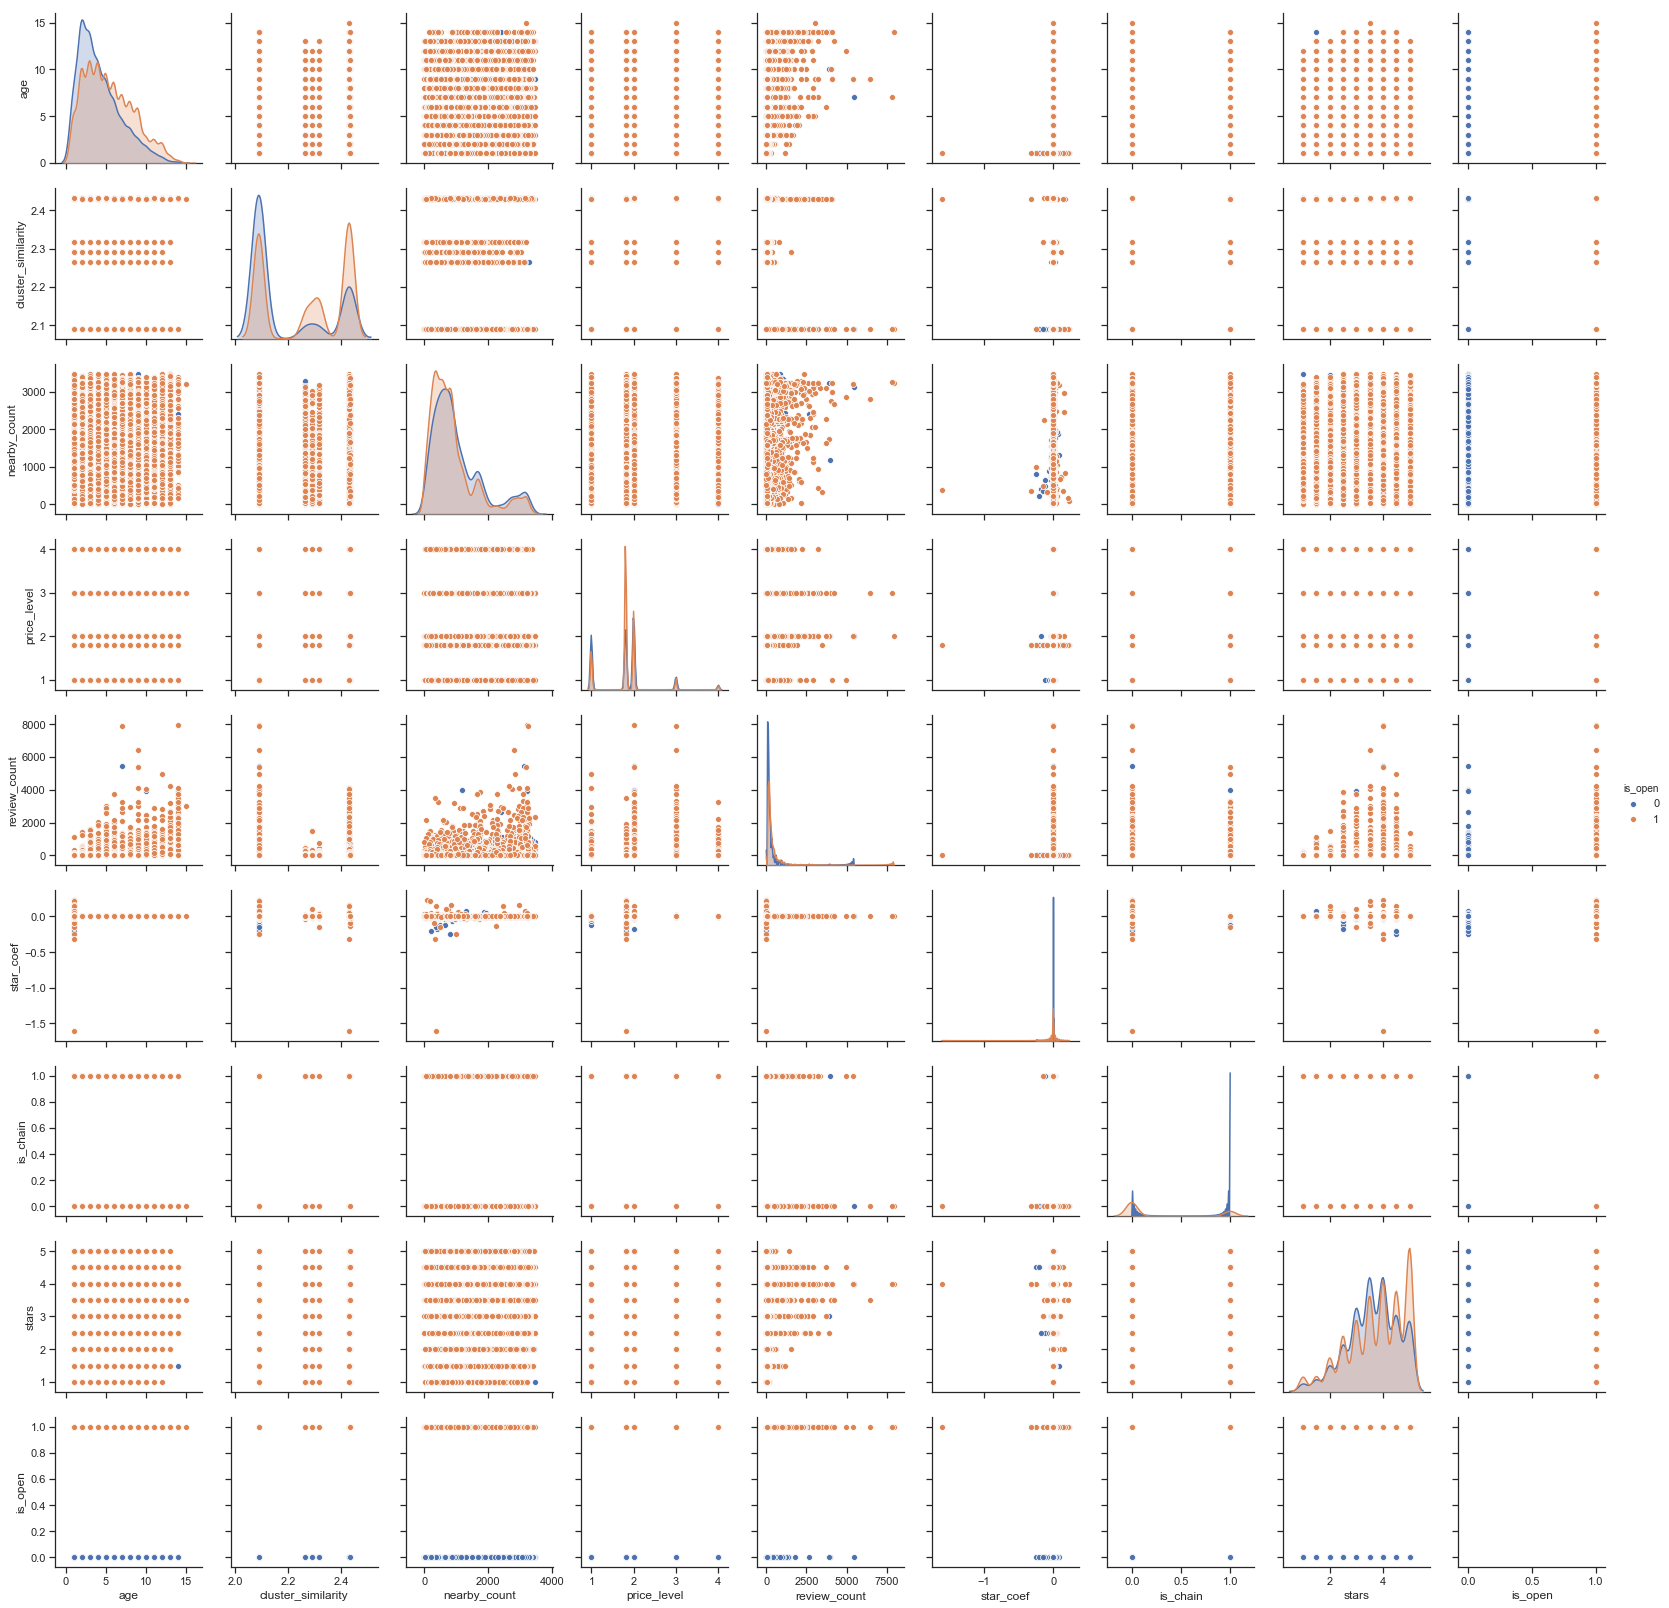

In [78]:
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(df_ml[["age", "cluster_similarity", "nearby_count", "price_level",
            "review_count", "star_coef",
            "is_chain", "stars", "is_open"]], 
                 hue = "is_open")

## models

In [79]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_ml_features, df_ml_gt, test_size = 0.2, 
    random_state = 10, stratify = df_ml_gt)

In [80]:
# Logistic Regression
clf_LogistcRegression.fit(X_train, list(y_train.values))
y_pred = clf_LogistcRegression.predict(X_test)
print 'Accuracy: ', clf_LogistcRegression.score(X_test, list(y_test.values))
print 'Precision: ', precision_score(list(y_test.values), y_pred)
print 'Recall: ', recall_score(list(y_test.values), y_pred)
print 'F1 Score: ', f1_score(list(y_test.values), y_pred)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test.values), y_pred)

Accuracy:  0.8171997157071784
Precision:  0.820277817556924
Recall:  0.9946171210279563
F1 Score:  0.8990739287396013
Confusion Matrix: 
[[  21 1255]
 [  31 5728]]


In [81]:
# Gaussian NB
clf_GaussianNB.fit(X_train, list(y_train.values))
y_pred_GaussianNB = clf_GaussianNB.predict(X_test)
print 'Accuracy: ', clf_GaussianNB.score(X_test, list(y_test.values))
print 'Precision: ', precision_score(list(y_test.values), y_pred_GaussianNB)
print 'Recall: ', recall_score(list(y_test.values), y_pred_GaussianNB)
print 'F1 Score: ', f1_score(list(y_test.values), y_pred_GaussianNB)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test.values), y_pred_GaussianNB)

Accuracy:  0.8042643923240939
Precision:  0.8427722152690864
Recall:  0.9354054523354749
F1 Score:  0.8866759937453708
Confusion Matrix: 
[[ 271 1005]
 [ 372 5387]]


In [82]:
# Decision Tree
clf_DecisionTree.fit(X_train, list(y_train.values))
y_pred_DecisionTree = clf_DecisionTree.predict(X_test)
print 'Accuracy: ', clf_DecisionTree.score(X_test, list(y_test.values))
print 'Precision: ', precision_score(list(y_test.values), y_pred_DecisionTree)
print 'Recall: ', recall_score(list(y_test.values), y_pred_DecisionTree)
print 'F1 Score: ', f1_score(list(y_test.values), y_pred_DecisionTree)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test.values), y_pred_DecisionTree)

Accuracy:  0.7525230987917555
Precision:  0.8539464411557435
Recall:  0.8416391734676159
F1 Score:  0.8477481416703105
Confusion Matrix: 
[[ 447  829]
 [ 912 4847]]


In [83]:
# Gradient Boost
clf_GradientBoost.fit(X_train, list(y_train.values))
y_pred_GradientBoost = clf_GradientBoost.predict(X_test)
print 'Accuracy: ', clf_GradientBoost.score(X_test, list(y_test.values))
print 'Precision: ', precision_score(list(y_test.values), y_pred_GradientBoost)
print 'Recall: ', recall_score(list(y_test.values), y_pred_GradientBoost)
print 'F1 Score: ', f1_score(list(y_test.values), y_pred_GradientBoost)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test.values), y_pred_GradientBoost)

Accuracy:  0.8325515280739161
Precision:  0.8431460674157303
Recall:  0.9772529953116861
F1 Score:  0.9052597715940165
Confusion Matrix: 
[[ 229 1047]
 [ 131 5628]]


In [84]:
# Random Forest
clf_RandomForest.fit(X_train, list(y_train.values))
y_pred_RandomForest = clf_RandomForest.predict(X_test)
print 'Accuracy: ', clf_RandomForest.score(X_test, list(y_test.values))
print 'Precision: ', precision_score(list(y_test.values), y_pred_RandomForest)
print 'Recall: ', recall_score(list(y_test.values), y_pred_RandomForest)
print 'F1 Score: ', f1_score(list(y_test.values), y_pred_RandomForest)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test.values), y_pred_RandomForest)

Accuracy:  0.8021321961620469
Precision:  0.8584797241832212
Recall:  0.907970133703768
F1 Score:  0.8825316455696203
Confusion Matrix: 
[[ 414  862]
 [ 530 5229]]


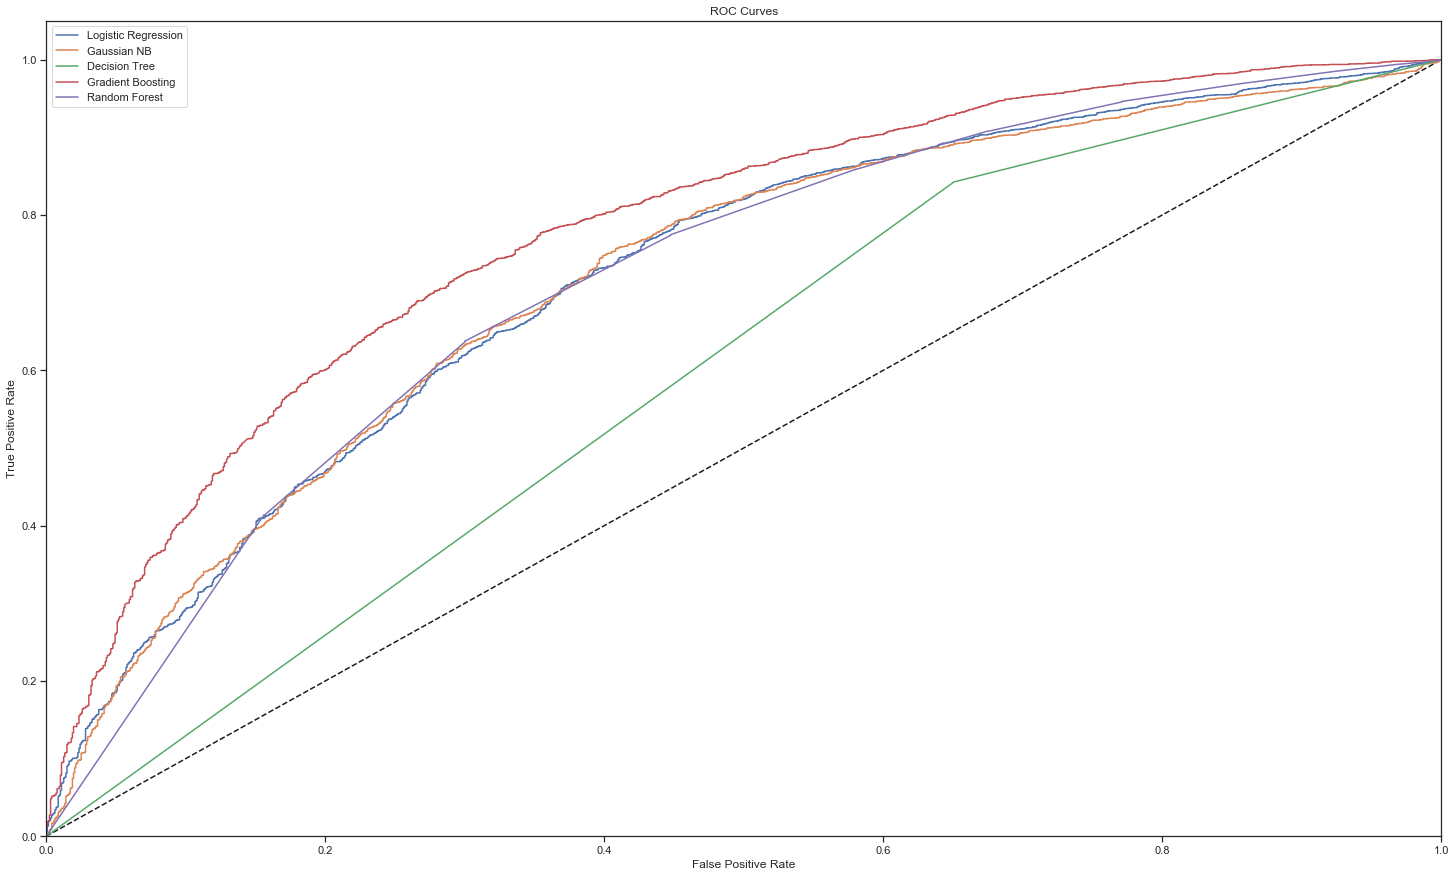

In [90]:
y_score_LogistcRegression = clf_LogistcRegression.decision_function(X_test)
y_score_GaussianNB = clf_GaussianNB.predict_proba(X_test)[:, 1]
y_score_DecisionTree = clf_DecisionTree.predict_proba(X_test)[:, 1]
y_score_GradientBoost = clf_GradientBoost.decision_function(X_test)
y_score_RandomForest = clf_RandomForest.predict_proba(X_test)[:, 1]

fpr_LogistcRegression, tpr_LogistcRegression, _ = roc_curve(y_test.values, y_score_LogistcRegression)
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(y_test.values, y_score_GaussianNB)
fpr_DecisionTree, tpr_DecisionTree, _ = roc_curve(y_test.values, y_score_DecisionTree)
fpr_GradientBoost, tpr_GradientBoost, _ = roc_curve(y_test.values, y_score_GradientBoost)
fpr_RandomForest, tpr_RandomForest, _ = roc_curve(y_test.values,y_score_RandomForest)

plt.figure(figsize = (25,15))
plt.plot([0,1],[0,1], 'k--')

plt.plot(fpr_LogistcRegression, tpr_LogistcRegression, label = 'Logistic Regression')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label = 'Gaussian NB')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label = 'Decision Tree')
plt.plot(fpr_GradientBoost, tpr_GradientBoost, label = 'Gradient Boosting')
plt.plot(fpr_RandomForest, tpr_RandomForest, label = 'Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## feature rank

## use random forest rank

In [150]:
# random forest importance analysis
importances_rf = clf_RandomForest.feature_importances_
std_rf = np.std([tree.feature_importances_ for tree in clf_RandomForest.estimators_], axis=0)
indices_rf = np.argsort(importances_rf)[::-1]
# Print the feature ranking
print "Feature ranking:"
for f in range(X_test.shape[1]):
    print "%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:, indices_rf[f]].name, importances_rf[indices_rf[f]])

Feature ranking:
1. feature: nearby_count (0.304730)
2. feature: review_count (0.202981)
3. feature: star_coef (0.152977)
4. feature: age (0.101757)
5. feature: stars (0.090631)
6. feature: cluster_similarity (0.070962)
7. feature: price_level (0.054274)
8. feature: is_chain (0.021688)


In [155]:
df_ml_features.head()

,age,cluster_similarity,nearby_count,price_level,review_count,star_coef,is_chain,stars
0,1,2.089968,29,2.00000,3,0.000000,0,4.5
1,7,2.089968,344,2.00000,4,-0.000029,1,4.0
2,6,2.430353,256,1.80918,4,0.000000,0,1.0
3,1,2.089968,115,1.80918,3,0.002122,0,1.5
4,5,2.430353,243,1.80918,20,0.000000,0,5.0


In [156]:
# Labels to be used for feature importance, same order as column labels
labels = ['nearby_count', 'review_count', 'star_coef', 'age', 'stars',\
          'cluster_similarity', 'price_level', 'is_chain']
len(labels)

8

(-1, 8)

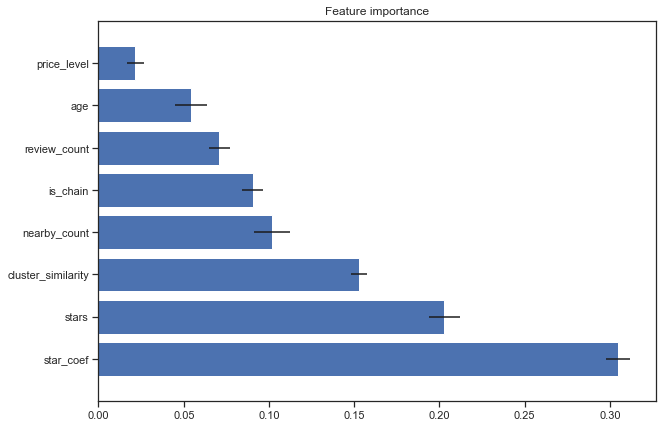

In [160]:
# Random forest
plt.figure(figsize = (10, 7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances_rf[indices], xerr = std_rf[indices], align = "center")
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices_rf])
plt.ylim([-1, X_test.shape[1]])

In [166]:
'''
# model
clf_LogistcRegression = LogisticRegression(random_state = 1)
clf_GaussianNB = GaussianNB()
clf_DecisionTree = DecisionTreeClassifier(random_state = 1)
clf_GradientBoost = GradientBoostingClassifier(random_state = 1)
clf_RandomForest = RandomForestClassifier(random_state = 1)
'''

# Gradient Boosting importances
importances_gb = clf_GradientBoost.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:, indices_gb[f]].name, importances_gb[indices_gb[f]]))

Feature ranking:
1. feature: cluster_similarity (0.313651)
2. feature: age (0.223460)
3. feature: review_count (0.114185)
4. feature: price_level (0.103306)
5. feature: stars (0.075444)
6. feature: nearby_count (0.068743)
7. feature: is_chain (0.056098)
8. feature: star_coef (0.045113)


(-1, 8)

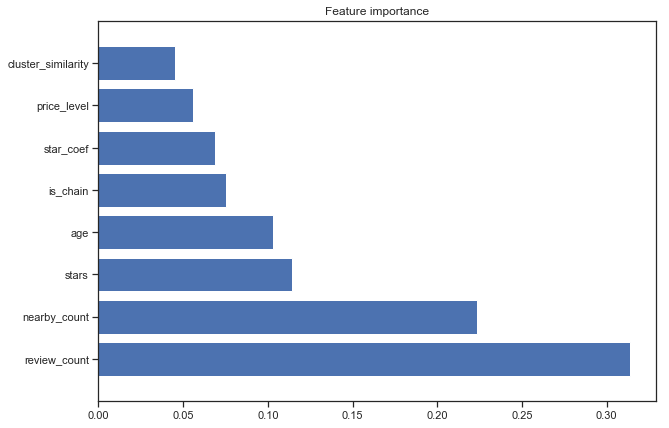

In [167]:
# Gradient boosting
# % matplotlib inline
plt.figure(figsize = (10, 7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances_gb[indices_gb], align = "center")
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices_gb])
plt.ylim([-1, X_test.shape[1]])

## feature analysis

Text(0.5,0,'Price Relative to price of this biz')

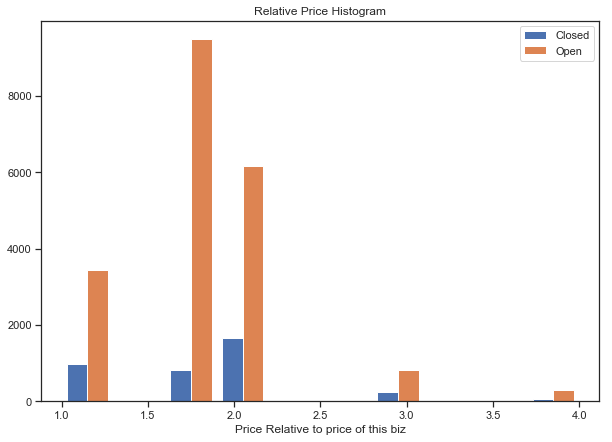

In [184]:
plt.figure(figsize = (10, 7))
plt.hist([df[df['is_open'] == 0].dropna()['price_level'].values,\
          df[df['is_open'] == 1].dropna()['price_level'].values],\
        label = ['Closed', 'Open'])

plt.legend()
plt.title('Relative Price Histogram')
plt.xlabel('Price Relative to price of this biz')

Text(0.5,0,'Review Star Linear Coefficient with Time')

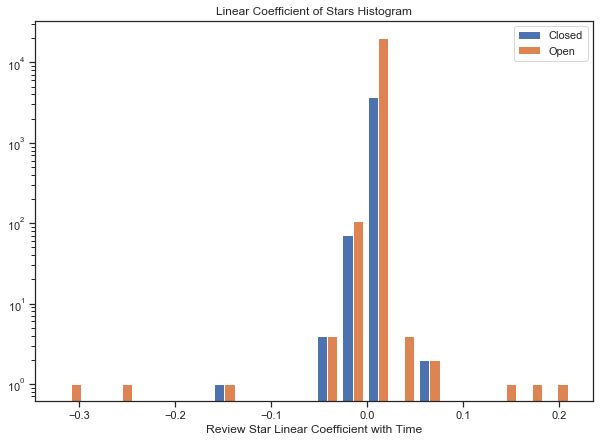

In [185]:
plt.figure(figsize = (10, 7))
plt.hist([df[df['is_open'] == 0].dropna()['star_coef'].values,\
          df[df['is_open'] == 1].dropna()['star_coef'].values],\
        label = ['Closed', 'Open'], bins = 20, log = True)

plt.legend()
plt.title('Linear Coefficient of Stars Histogram')
plt.xlabel('Review Star Linear Coefficient with Time')

Text(0.5,0,'Review Count')

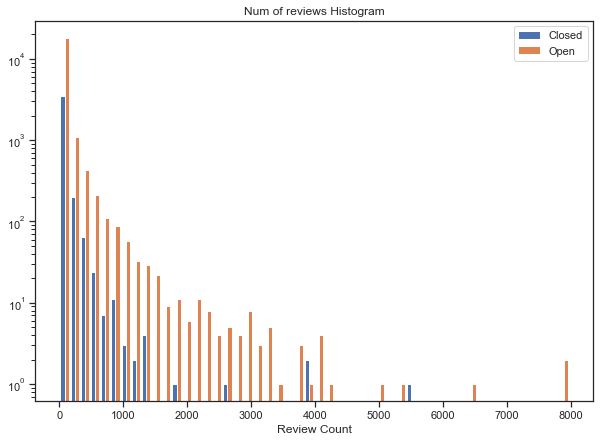

In [187]:
plt.figure(figsize = (10, 7))
plt.hist([df[df['is_open'] == 0].dropna()['review_count'].values,\
          df[df['is_open'] == 1].dropna()['review_count'].values],\
        label = ['Closed', 'Open'], bins = 50, log = True)

plt.legend()
plt.title('Num of reviews Histogram')
plt.xlabel('Review Count')

Text(0.5,0,'Biz count in 1 mile')

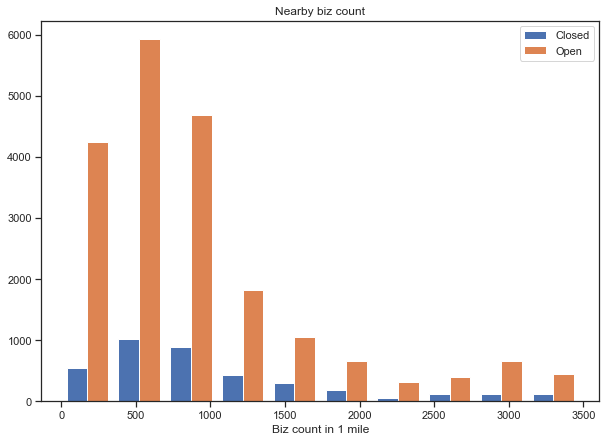

In [188]:
plt.figure(figsize = (10, 7))
plt.hist([df[df['is_open'] == 0].dropna()['nearby_count'].values,\
          df[df['is_open'] == 1].dropna()['nearby_count'].values],\
        label = ['Closed', 'Open'])

plt.legend()
plt.title('Nearby biz count')
plt.xlabel('Biz count in 1 mile')

Text(0.5,0,'Is Restaurant a Chain?')

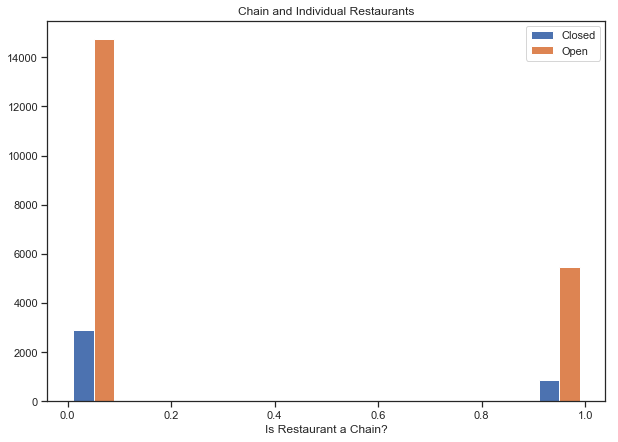

In [189]:
plt.figure(figsize = (10, 7))
plt.hist([df[df['is_open'] == 0].dropna()['is_chain'].values,\
          df[df['is_open'] == 1].dropna()['is_chain'].values],\
        label = ['Closed', 'Open'])
plt.legend()
plt.title('Chain and Individual biz')
plt.xlabel('Is biz a Chain?')

## use PCA

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_transformed = pca.fit_transform(df_ml_features)
print "eigenvalues"
print pca.explained_variance_ratio_
print pca.score(df_ml_features)

eigenvalues
[9.39481799e-01 6.05029626e-02 1.29200021e-05 1.63875758e-06
 3.84034705e-07 2.62707946e-07 3.31594729e-08]
-16.16388337226555


In [130]:
print X_transformed.shape

(35173, 7)


In [131]:
# split data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_transformed, df_ml_gt, test_size = 0.2, 
    random_state = 10, stratify = df_ml_gt)

In [132]:
# model
clf_LogistcRegression_pca = LogisticRegression(random_state = 1)
clf_GaussianNB_pca = GaussianNB()
clf_DecisionTree_pca = DecisionTreeClassifier(random_state = 1)
clf_GradientBoost_pca = GradientBoostingClassifier(random_state = 1)
clf_RandomForest_pca = RandomForestClassifier(random_state = 1)

In [133]:
# Logistic Regression
clf_LogistcRegression_pca.fit(X_train_pca, list(y_train_pca.values))
y_pred_pca = clf_LogistcRegression_pca.predict(X_test_pca)
print 'Accuracy: ', clf_LogistcRegression_pca.score(X_test_pca, list(y_test_pca.values))
print 'Precision: ', precision_score(list(y_test_pca.values), y_pred_pca)
print 'Recall: ', recall_score(list(y_test_pca.values), y_pred_pca)
print 'F1 Score: ', f1_score(list(y_test_pca.values), y_pred_pca)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test_pca.values), y_pred_pca)

Accuracy:  0.8166311300639659
Precision:  0.8205422464495769
Recall:  0.9932279909706546
F1 Score:  0.898664571877455
Confusion Matrix: 
[[  25 1251]
 [  39 5720]]


In [134]:
# Gaussian NB
clf_GaussianNB_pca.fit(X_train_pca, list(y_train_pca.values))
y_pred_GaussianNB_pca = clf_GaussianNB_pca.predict(X_test_pca)
print 'Accuracy: ', clf_GaussianNB_pca.score(X_test_pca, list(y_test_pca.values))
print 'Precision: ', precision_score(list(y_test_pca.values), y_pred_GaussianNB_pca)
print 'Recall: ', recall_score(list(y_test_pca.values), y_pred_GaussianNB_pca)
print 'F1 Score: ', f1_score(list(y_test_pca.values), y_pred_GaussianNB_pca)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test_pca.values), y_pred_GaussianNB_pca)

Accuracy:  0.8029850746268656
Precision:  0.8408417770849571
Recall:  0.9366209411356138
F1 Score:  0.886150813208477
Confusion Matrix: 
[[ 255 1021]
 [ 365 5394]]


In [135]:
# Decision Tree
clf_DecisionTree_pca.fit(X_train_pca, list(y_train_pca.values))
y_pred_DecisionTree_pca = clf_DecisionTree_pca.predict(X_test_pca)
print 'Accuracy: ', clf_DecisionTree_pca.score(X_test_pca, list(y_test_pca.values))
print 'Precision: ', precision_score(list(y_test_pca.values), y_pred_DecisionTree_pca)
print 'Recall: ', recall_score(list(y_test_pca.values), y_pred_DecisionTree_pca)
print 'F1 Score: ', f1_score(list(y_test_pca.values), y_pred_DecisionTree_pca)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test_pca.values), y_pred_DecisionTree_pca)

Accuracy:  0.7491115849324804
Precision:  0.8491258741258741
Recall:  0.8433755860392429
F1 Score:  0.8462409617562504
Confusion Matrix: 
[[ 413  863]
 [ 902 4857]]


In [136]:
# Gradient Boost
clf_GradientBoost_pca.fit(X_train_pca, list(y_train_pca.values))
y_pred_GradientBoost_pca = clf_GradientBoost_pca.predict(X_test_pca)
print 'Accuracy: ', clf_GradientBoost_pca.score(X_test_pca, list(y_test_pca.values))
print 'Precision: ', precision_score(list(y_test_pca.values), y_pred_GradientBoost_pca)
print 'Recall: ', recall_score(list(y_test_pca.values), y_pred_GradientBoost_pca)
print 'F1 Score: ', f1_score(list(y_test_pca.values), y_pred_GradientBoost_pca)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test_pca.values), y_pred_GradientBoost_pca)

Accuracy:  0.831272210376688
Precision:  0.8433463502553319
Recall:  0.9749956589685709
F1 Score:  0.9044052508657485
Confusion Matrix: 
[[ 233 1043]
 [ 144 5615]]


In [137]:
# Random Forest
clf_RandomForest_pca.fit(X_train_pca, list(y_train_pca.values))
y_pred_RandomForest_pca = clf_RandomForest_pca.predict(X_test_pca)
print 'Accuracy: ', clf_RandomForest_pca.score(X_test_pca, list(y_test_pca.values))
print 'Precision: ', precision_score(list(y_test_pca.values), y_pred_RandomForest_pca)
print 'Recall: ', recall_score(list(y_test_pca.values), y_pred_RandomForest_pca)
print 'F1 Score: ', f1_score(list(y_test_pca.values), y_pred_RandomForest_pca)
print 'Confusion Matrix: \n', confusion_matrix(list(y_test_pca.values), y_pred_RandomForest_pca)

Accuracy:  0.7954513148542999
Precision:  0.8537504094333442
Recall:  0.9051918735891648
F1 Score:  0.8787189211967973
Confusion Matrix: 
[[ 383  893]
 [ 546 5213]]


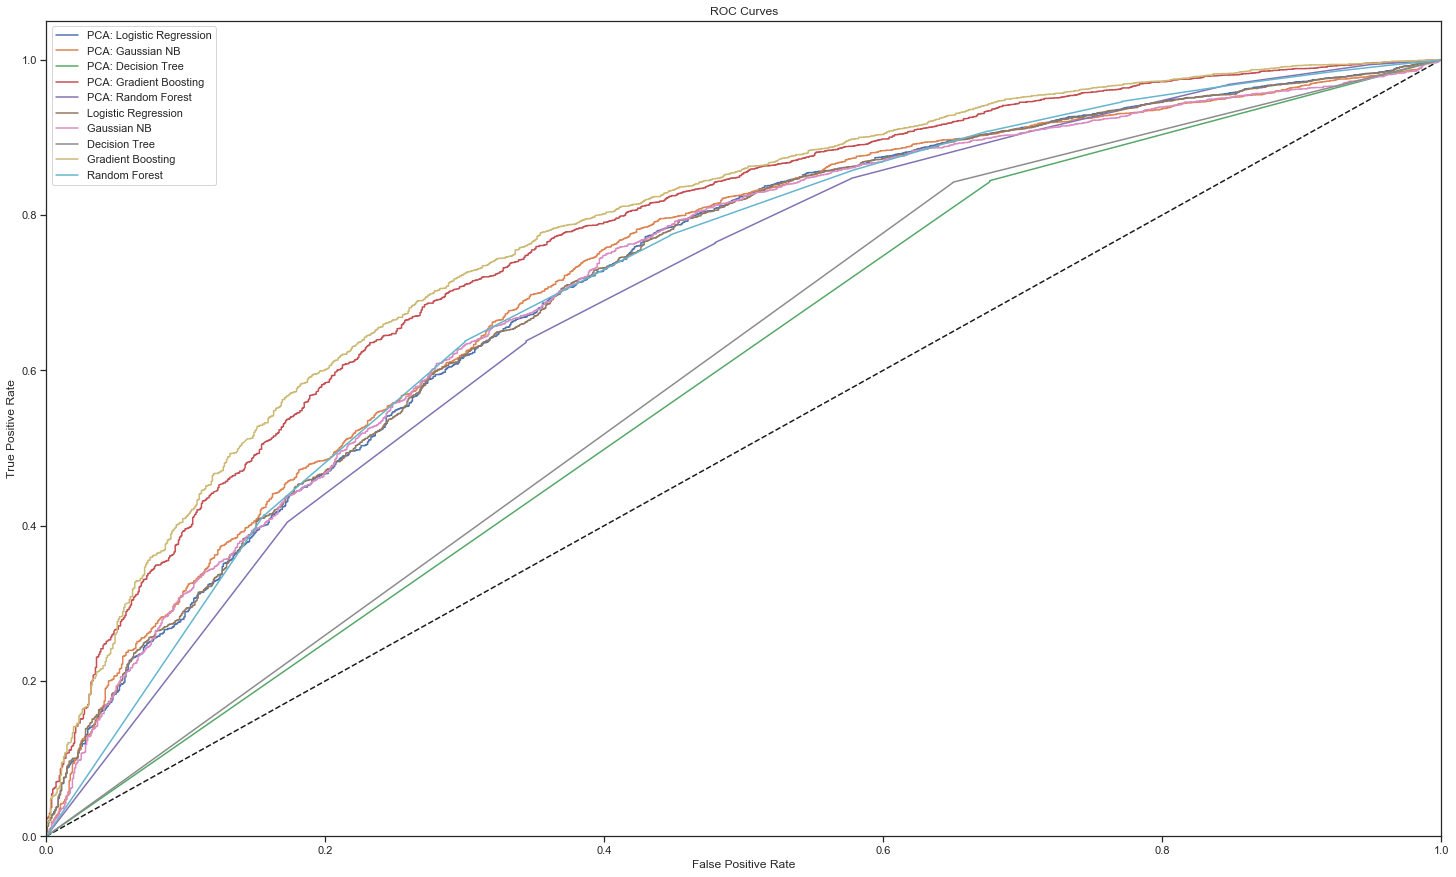

In [138]:
y_score_LogistcRegression_pca = clf_LogistcRegression_pca.decision_function(X_test_pca)
y_score_GaussianNB_pca = clf_GaussianNB_pca.predict_proba(X_test_pca)[:, 1]
y_score_DecisionTree_pca = clf_DecisionTree_pca.predict_proba(X_test_pca)[:, 1]
y_score_GradientBoost_pca = clf_GradientBoost_pca.decision_function(X_test_pca)
y_score_RandomForest_pca = clf_RandomForest_pca.predict_proba(X_test_pca)[:, 1]

fpr_LogistcRegression_pca, tpr_LogistcRegression_pca, _ = roc_curve(y_test_pca.values, y_score_LogistcRegression_pca)
fpr_GaussianNB_pca, tpr_GaussianNB_pca, _ = roc_curve(y_test_pca.values, y_score_GaussianNB_pca)
fpr_DecisionTree_pca, tpr_DecisionTree_pca, _ = roc_curve(y_test_pca.values, y_score_DecisionTree_pca)
fpr_GradientBoost_pca, tpr_GradientBoost_pca, _ = roc_curve(y_test_pca.values, y_score_GradientBoost_pca)
fpr_RandomForest_pca, tpr_RandomForest_pca, _ = roc_curve(y_test_pca.values, y_score_RandomForest_pca)

###############
# before pca
fpr_LogistcRegression, tpr_LogistcRegression, _ = roc_curve(y_test.values, y_score_LogistcRegression)
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(y_test.values, y_score_GaussianNB)
fpr_DecisionTree, tpr_DecisionTree, _ = roc_curve(y_test.values, y_score_DecisionTree)
fpr_GradientBoost, tpr_GradientBoost, _ = roc_curve(y_test.values, y_score_GradientBoost)
fpr_RandomForest, tpr_RandomForest, _ = roc_curve(y_test.values,y_score_RandomForest)
###############
 
plt.figure(figsize = (25,15))
plt.plot([0,1],[0,1], 'k--')

plt.plot(fpr_LogistcRegression_pca, tpr_LogistcRegression_pca, label = 'PCA: Logistic Regression')
plt.plot(fpr_GaussianNB_pca, tpr_GaussianNB_pca, label = 'PCA: Gaussian NB')
plt.plot(fpr_DecisionTree_pca, tpr_DecisionTree_pca, label = 'PCA: Decision Tree')
plt.plot(fpr_GradientBoost_pca, tpr_GradientBoost_pca, label = 'PCA: Gradient Boosting')
plt.plot(fpr_RandomForest_pca, tpr_RandomForest_pca, label = 'PCA: Random Forest')

##########
# before pca
plt.plot(fpr_LogistcRegression, tpr_LogistcRegression, label = 'Logistic Regression')
plt.plot(fpr_GaussianNB, tpr_GaussianNB, label = 'Gaussian NB')
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label = 'Decision Tree')
plt.plot(fpr_GradientBoost, tpr_GradientBoost, label = 'Gradient Boosting')
plt.plot(fpr_RandomForest, tpr_RandomForest, label = 'Random Forest')
##########

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## confusion matrix

In [217]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print "Normalized confusion matrix"
    else:
        print 'Confusion matrix, without normalization'

    print cm

    plt.figure(figsize = (10,8))
    plt.imshow(cm, interpolation ='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 229 1047]
 [ 131 5628]]


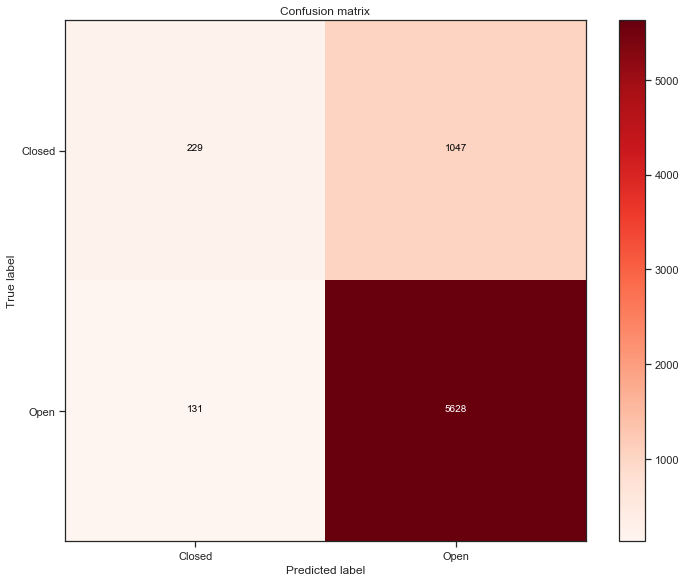

In [218]:
plot_confusion_matrix(confusion_matrix(list(y_test.values), y_pred_GradientBoost),\
                          classes = ['Closed', 'Open'], title = 'Confusion matrix')

## pca

Normalized confusion matrix
[[0.18260188 0.81739812]
 [0.02500434 0.97499566]]


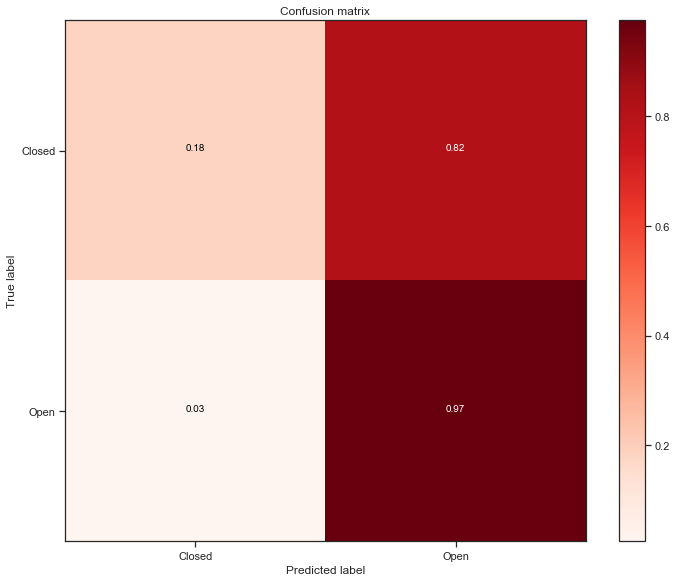

In [220]:
plot_confusion_matrix(confusion_matrix(list(y_test.values), y_pred_GradientBoost_pca),\
                          classes = ['Closed', 'Open'], title = 'Confusion matrix', normalize = True)